<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Pregnancies               768 non-null    int64   
 1   Glucose                   768 non-null    int64   
 2   BloodPressure             768 non-null    category
 3   SkinThickness             768 non-null    int64   
 4   Insulin                   768 non-null    int64   
 5   BMI                       768 non-null    category
 6   DiabetesPedigreeFunction  768 non-null    float64 
 7   Age                       768 non-null    category
 8   Outcome                   768 non-null    int64   
dtypes: category(3), float64(1), int64(5)
memory usage: 39.0 KB


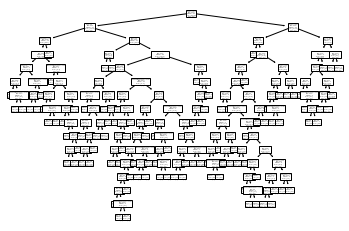

In [76]:
import pandas as pd
from sklearn import tree
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt


df = pd.read_csv("diabetes.csv")
# df.info()

# categ = ["underweight", "healthy", "overweigth", "obesity"]
categ = [1, 2, 3, 4, 5, 6]
bns = [-1, 18, 24, 25, 100, 120, 130]
df.BMI = pd.cut(x=df.BMI, bins=bns, labels=categ)


# categ = ["dead", "hypotension", "normal", "hight"]
categ = [1, 2, 3, 4]
bns = [-1, 40, 60, 80, 130]
df.BloodPressure = pd.cut(x=df.BloodPressure, bins=bns, labels=categ)


# categ = ["child", "teen", "young", "adult", "old"]
categ = [1, 2, 3, 4, 5, 6]
bns = [0, 11, 18, 25, 60, 80, 100]
df.Age = pd.cut(x=df.Age, bins=bns, labels=categ)


features = [
    "Pregnancies",
    "Glucose",
    "BloodPressure",
    "SkinThickness",
    "Insulin",
    "BMI",
    "DiabetesPedigreeFunction",
    "Age",
]
target = ["Outcome"]
X = df[features]
Y = df[target]


X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.33, random_state=None
)

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, Y_train)

df.info()

fig = plt.figure()
tree.plot_tree(clf, feature_names=features,  class_names=True);




Datos: x1, x2


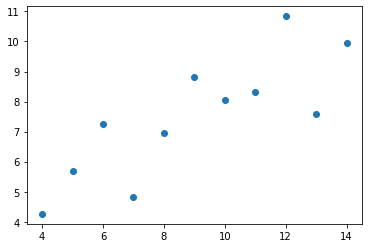

coeficiente de determinación 0.6665424595087748
intercepcion: 3.0000909090909094
pendiente 0.5000909090909093
Regresion-[ 8.001       7.00081818  9.50127273  7.50090909  8.50109091 10.00136364
  6.00063636  5.00045455  9.00118182  6.50072727  5.50054545]

Datos: x3, x4


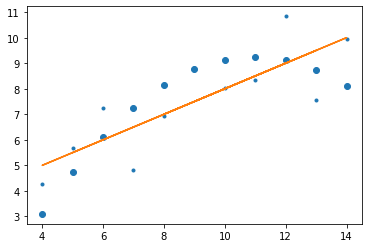

coeficiente de determinación 0.6662420337274844
intercepcion: 3.00090909090909
pendiente 0.5
Regresion-[ 8.00090909  7.00090909  9.50090909  7.50090909  8.50090909 10.00090909
  6.00090909  5.00090909  9.00090909  6.50090909  5.50090909]

Datos: x5, x6


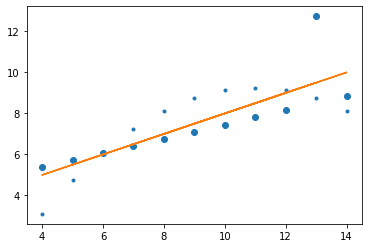

coeficiente de determinación 0.6663240410665592
intercepcion: 3.002454545454545
pendiente 0.4997272727272728
Regresion-[7.99972727 7.00027273 9.49890909 7.5        8.49945455 9.99863636
 6.00081818 5.00136364 8.99918182 6.50054545 5.50109091]

Datos: x7, x8


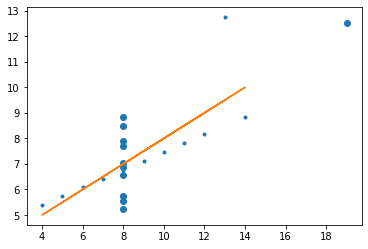

coeficiente de determinación 0.6667072568984653
intercepcion: 3.0017272727272726
pendiente 0.49990909090909097
Regresion-[ 7.001  7.001  7.001  7.001  7.001  7.001  7.001 12.5    7.001  7.001
  7.001]


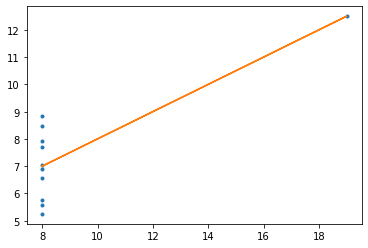

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt


df = pd.read_csv("data_para_regresion.txt")
# df.info()

xs = ["x1", "x3", "x5", "x7"] 
ys = ["x2", "x4", "x6", "x8"]

for x1, x2 in zip(xs,ys):
    print(f"\nDatos: {x1}, {x2}")
    # grafico
    plt.scatter(df[x1], df[x2])
    plt.show()

    x1_l=np.array(df[x1]).reshape(-1, 1)
    model = LinearRegression()
    model.fit(x1_l, df[x2])

    r = model.score(x1_l, df[x2])
    print('coeficiente de determinación', r)
    print('intercepcion:', model.intercept_)
    print('pendiente', model.coef_[0])

    y1_pred = model.predict(x1_l)
    print('Regresion', y1_pred, sep='-')

    plt.plot(df[x1], df[x2], '.')
    plt.plot(x1_l, y1_pred)

